In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("abalone.csv")
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14


In [3]:
data.keys()

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [4]:
data=pd.DataFrame(data=data)
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14


      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
5     F  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.3300  20
6     F  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.2600  16
7     M  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.1650   9
8     F  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.3200  19
9     F  0.525  0.380  0.140  0.6065  0.1940  0.1475  0.2100  14
10    M  0.430  0.350  0.110  0.4060  0.1675  0.0810  0.1350  10
11    M  0.490  0.380  0.135  0.5415  0.2175  0.0950  0.1900  11
12    F  0.535  0.405  0.145  0.6845  0.2725  0.1710  0.2050  10
13    F  0.470  0.355  0.100  0.4755  0.1675  0.0805  0.1850  10
14    M  0.500  0.400  0.

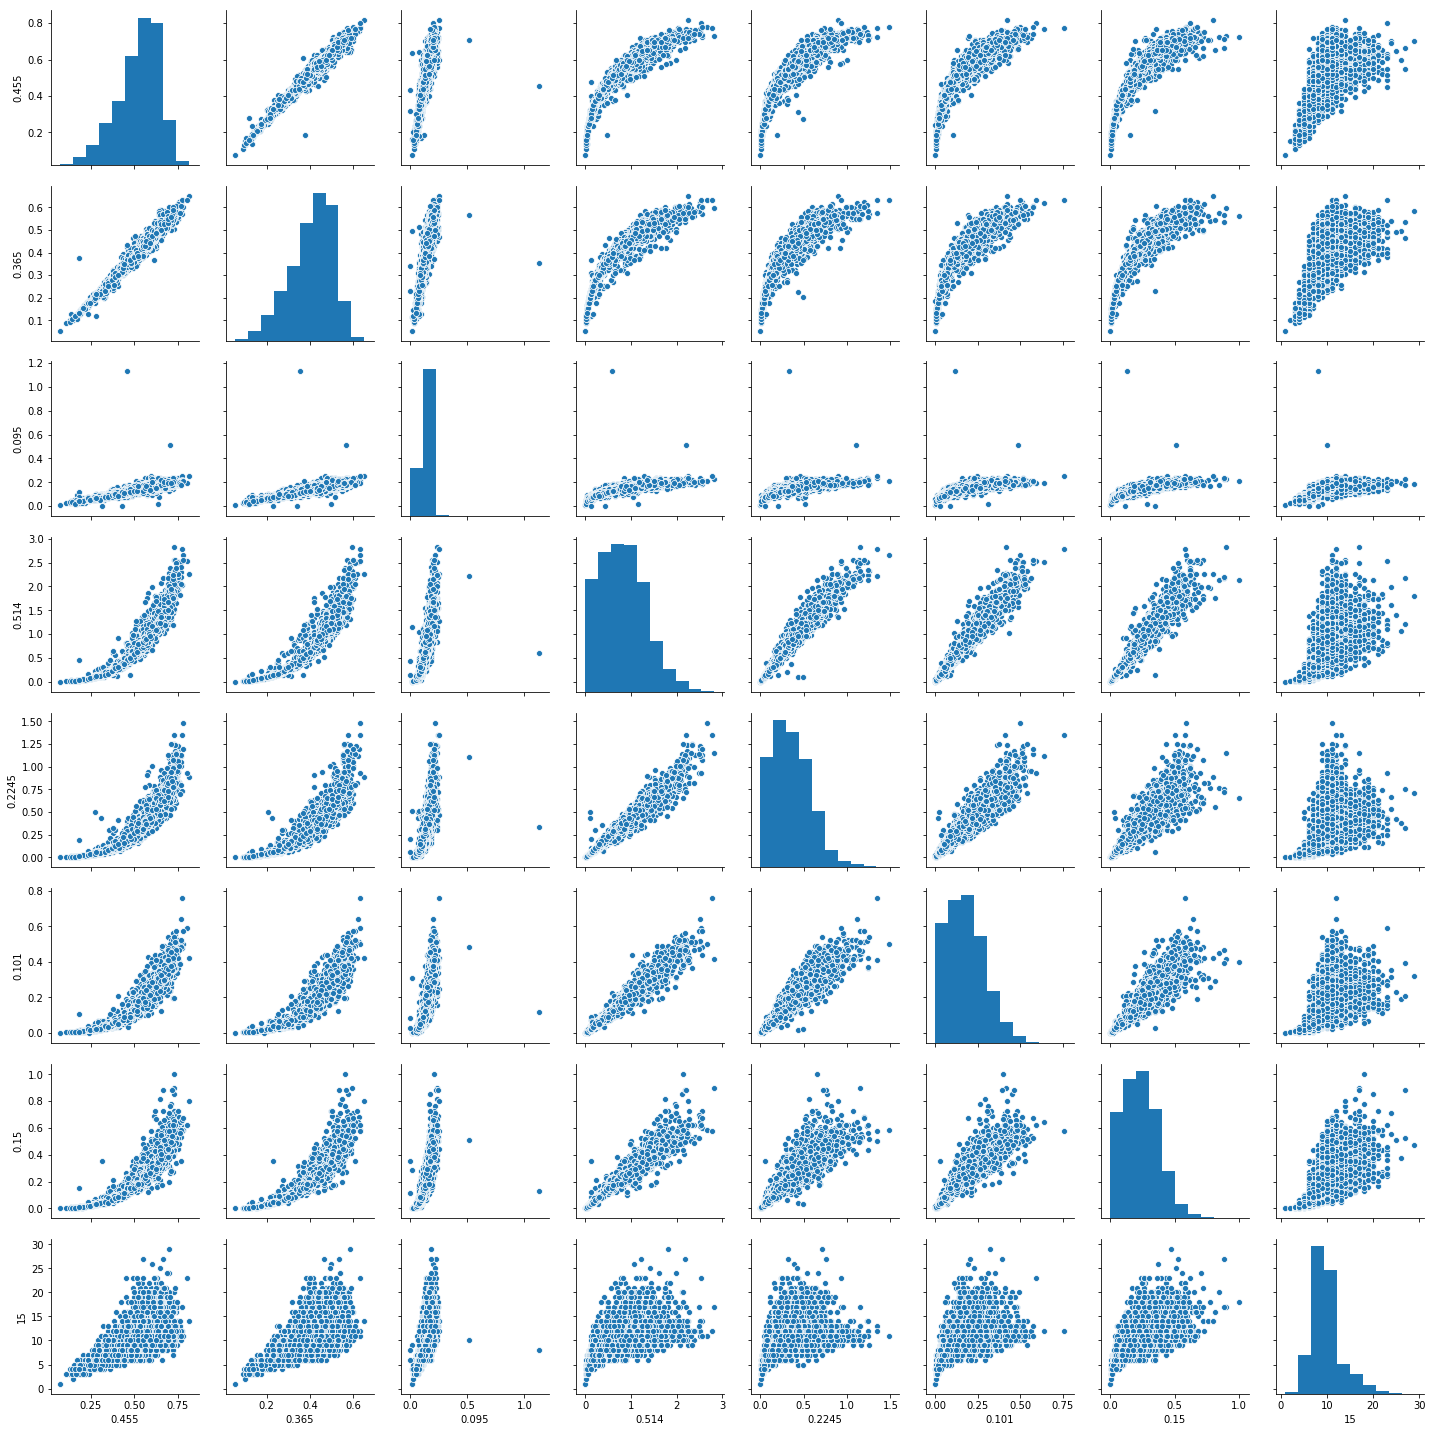

In [5]:
df=pd.DataFrame(data)
print(df)
sb.pairplot(df)

In [6]:
x=data.iloc[:,0:-1]
x.shape

(4176, 8)

In [7]:
pca=PCA(n_components=10)

In [8]:
df=data.drop(['M'],axis=1)
df

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
7,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
8,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
9,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14


In [9]:
y=data.iloc[:,-1]

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scale = StandardScaler()

In [12]:
#x = scale.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [14]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score,(y_test,predmnb))
print(confusion_matrix,(y_test,predmnb))
print(classification_report,(y_test,predmnb))

ValueError: could not convert string to float: 'I'

In [15]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=dtc.predict(x_test)
print(accuracy_score,(y_test,predmnb))
print(confusion_matrix,(y_test,predmnb))
print(classification_report,(y_test,predmnb))

ValueError: could not convert string to float: 'M'

In [16]:
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
predd
print(accuracy_score,(y_test,predmnb))
print(confusion_matrix,(y_test,predmnb))
print(classification_report,(y_test,predmnb))

ValueError: could not convert string to float: 'I'

In [17]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score,(y_test,predmnb))
print(confusion_matrix,(y_test,predmnb))
print(classification_report,(y_test,predmnb))

ValueError: could not convert string to float: 'M'

In [18]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score,(y_test,predmnb))
    print(confusion_matrix,(y_test,predmnb))
    print(classification_report,(y_test,predmnb))

In [19]:
svmkernel('rbf')

ValueError: could not convert string to float: 'M'

In [20]:
svmkernel('poly')

ValueError: could not convert string to float: 'M'

In [53]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_prediction.csv')

NameError: name 'predsvc' is not defined